In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman_data= pd.read_csv('D:\haberman.csv',names=['age','op_year','Auxilary_nodes','surv_status'])
print(haberman_data.shape)
print(haberman_data.columns)
print(haberman_data['surv_status'].value_counts())


(306, 4)
Index(['age', 'op_year', 'Auxilary_nodes', 'surv_status'], dtype='object')
1    225
2     81
Name: surv_status, dtype: int64


1- surv_status > 5 years(225) ,
2- surv_status < 5 years(81)

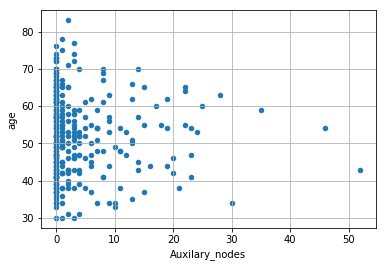

In [28]:
haberman_data.plot(kind='scatter', x='Auxilary_nodes', y='age') 
plt.grid()
plt.show()

In above plot we are not able to distinguish between surived and not survived. To distingush them we can use seaborn

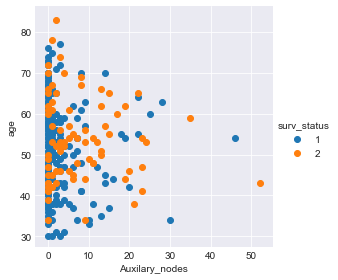

In [38]:
sns.set_style('darkgrid') #whitegrid
sns.FacetGrid(haberman_data,hue='surv_status',size=4) \
 .map(plt.scatter, 'Auxilary_nodes', 'age')\
 .add_legend();
plt.show();

FacetGrid-- is used for data classification , 
hue-- on which classification should be done .
As there are three features we can plot for all combinations of features ('age','op_year','Auxilary_nodes') to identify which features give reasonable classification

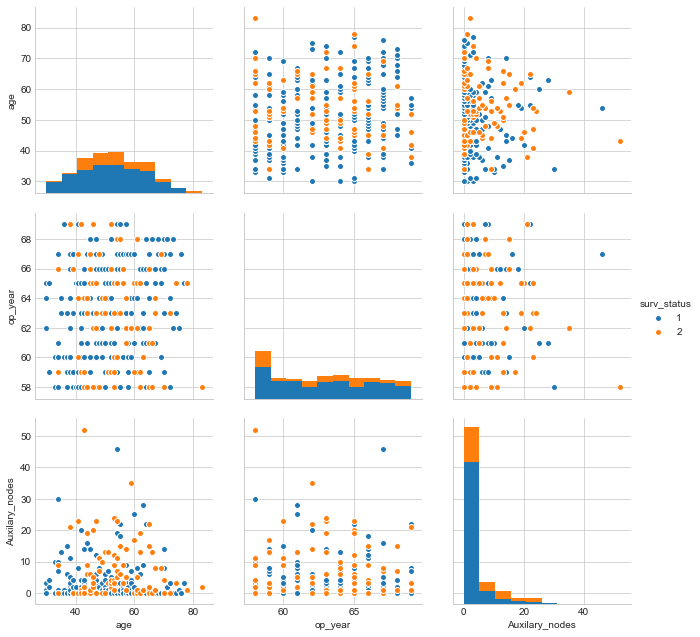

In [39]:
#plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman_data, hue='surv_status', size=3, vars=['age','op_year', 'Auxilary_nodes'])
plt.show()

In Plot-2,4 (age VS op_year) data is overlapping . In Plot-6,8 (op_year VS Auxilary_nodes) data is overlapping 
In Plot-3,7 (age VS Auxilary_nodes) data is distinguished well complared to other plots.
Plot- 1,5,9 are histograms of features.

# PDF

D:\Python1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Python1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Python1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Python1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.

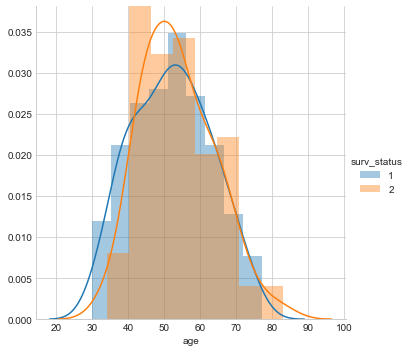

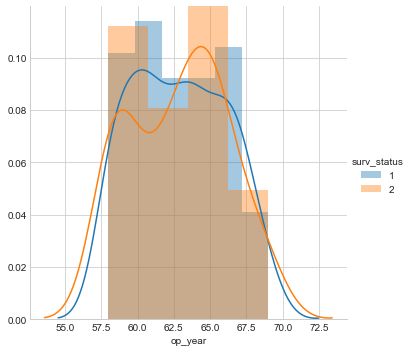

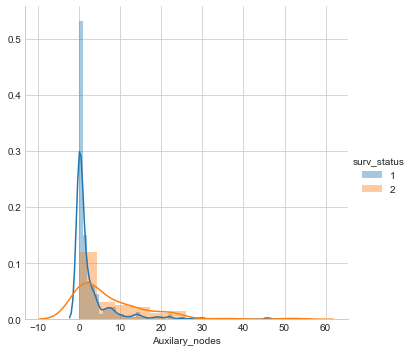

In [47]:
sns.FacetGrid(haberman_data,hue='surv_status', size=5)\
.map(sns.distplot,'age')\
.add_legend();
sns.FacetGrid(haberman_data,hue='surv_status', size=5)\
.map(sns.distplot,'op_year')\
.add_legend();
sns.FacetGrid(haberman_data,hue='surv_status', size=5)\
.map(sns.distplot,'Auxilary_nodes')\
.add_legend();
#plt.show()

For 'age' PDF there is overlap in  surv_status data. For 'op_year' PDF there is overlap in  surv_status data.
But in 'Auxilary_nodes' PDF for (Auxilary_nodes <= 0) ====> Patient Survives, for(Auxilary_nodes >0 && <3.5) ====> there is high chance for survival ,for(Auxilary_nodes >3.5) ====> there is less chance for survival. In order to know % of people surviving we can use CDF.

# CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


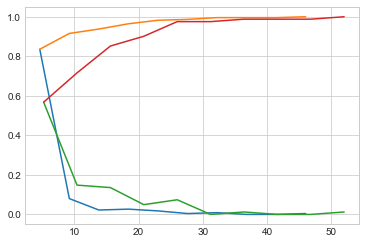

In [65]:
haberman_Long_Survive = haberman_data.loc[haberman_data['surv_status'] == 1];
haberman_Short_Survive = haberman_data.loc[haberman_data['surv_status'] == 2];


counts, bin_edges = np.histogram(haberman_Long_Survive['Auxilary_nodes'], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);


counts, bin_edges=np.histogram(haberman_Short_Survive['Auxilary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

CDF of Long survival >5 years is shown by orange line. If no.of nodes >40 there is  100 % less chance of survival. If no. of nodes is less than 5 There is  85 %chance of survival. .If no. of nodes increases the chance of survival decreases.

CDF of Long survival <5 years is shown by red line. If no. of nodes <5 there is 55% chance of short survival. If no. of nodes >40 there is 100% high chance of short survival.

In [79]:
print('Means:')
print (np.mean(haberman_Long_Survive['Auxilary_nodes']))
print (np.mean(np.append(haberman_Long_Survive['Auxilary_nodes'],50)))
print (np.mean(haberman_Short_Survive['Auxilary_nodes']))

print('\nStandard Deviation:')
print(np.mean(haberman_Long_Survive['Auxilary_nodes']))
print(np.mean(haberman_Short_Survive['Auxilary_nodes']))

print('\nMedians:')
print(np.median(haberman_Long_Survive['Auxilary_nodes']))
print(np.median(np.append(haberman_Long_Survive['Auxilary_nodes'],50)))
print(np.median(haberman_Short_Survive['Auxilary_nodes']))

print('\nQuantiles:')
print(np.percentile(haberman_Long_Survive['Auxilary_nodes'],np.arange(0,100,25)))
print(np.percentile(haberman_Short_Survive['Auxilary_nodes'],np.arange(0,100,25)))

print('\n90th percentile:')
print(np.percentile(haberman_Long_Survive['Auxilary_nodes'],90))
print(np.percentile(haberman_Short_Survive['Auxilary_nodes'],90))



Means:
2.7911111111111113
3.0
7.45679012345679

Standard Deviation:
2.7911111111111113
7.45679012345679

Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


Statistical measures of 'Auxilary_nodes' along with  noise added

Patients who have average 4 auxillary nodes have short survival ---from median 

Pateints who survived long had  50% nodes = 0 ,75% nodes< 3 ,25% nodes>3, 
Pateints who survived short had  50% nodes <=4 ,75% nodes<=11 ,25% nodes>11 

At 90th% there if nodes detected is >8 then it has long survival status and if nodes are >20 then patients will have short survival status

# Box Plot

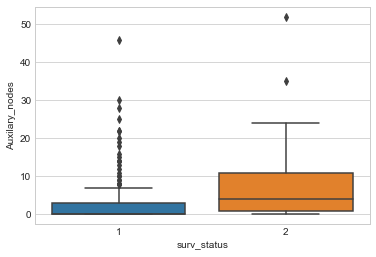

In [82]:
sns.boxplot(x='surv_status',y='Auxilary_nodes', data=haberman_data)
plt.show()

In above box whiskers 25th percentile and 50th percentile are almost same for surv_status(1) >5 years.

For surv_status(2) < 5 years 50th percentile of nodes are almost same as surv_status(1) >5 years 75th percentile. 

For nodes 0-7 there is high chance of coincidence for two classes. which gives error in classification for 50 % of surv_status(2) < 5 years . 